# Exercise 7
***

## 1.

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
N=1000

np.random.seed(10)

x = [
    np.random.normal(loc=0, scale=1, size=N), 
    np.random.normal(loc=0, scale=3, size=N),
    ]

x += [2*x[0] + x[1]]
    

df = np.array(x)

In [3]:
cov = np.cov(df)
eig = la.svd(cov)
l0, V0 = la.eig(cov)

In [4]:
print((V0), '\n')
print(eig[0],'\n')
print((l0),'\n')
print(eig[1], '\n')

[[-0.08282427 -0.81649658  0.57137857]
 [-0.61696871 -0.40824829 -0.67281717]
 [-0.78261725  0.40824829  0.46993997]] 

[[-0.08282427  0.57137857 -0.81649658]
 [-0.61696871 -0.67281717 -0.40824829]
 [-0.78261725  0.46993997  0.40824829]] 

[ 2.07308144e+01+0.j -2.62460684e-16+0.j  2.26185275e+00+0.j] 

[2.07308144e+01 2.26185275e+00 4.40994858e-16] 



So the two functions are not outputting it in the same order and also really small values are different but they are still very small.

In [5]:
Lambda = np.diag(l0)
print(Lambda)
print((Lambda[0,0]+Lambda[1,1])/np.trace(Lambda)) 

df_new = np.dot(V0.T, df)

[[ 2.07308144e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -2.62460684e-16+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  2.26185275e+00+0.j]]
(0.9016272128334478+0j)


The second eigenvalue has no impact the we cen reduce the data 

/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


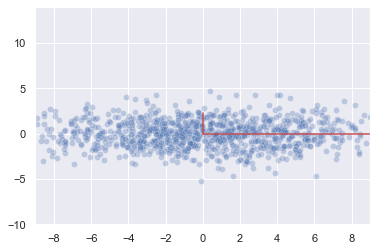

In [6]:
sns.scatterplot(df_new[0,:], df_new[2,:], alpha=0.3)
for li, vi in zip(l0, np.dot(V0.T, V0).T):
    plt.plot([0, li*vi[0]], [0, li*vi[2]], color='r')
    plt.xlim((-9, 9))
    plt.ylim((-10, 14))

<AxesSubplot:title={'center':'After PCA F2, F3'}>

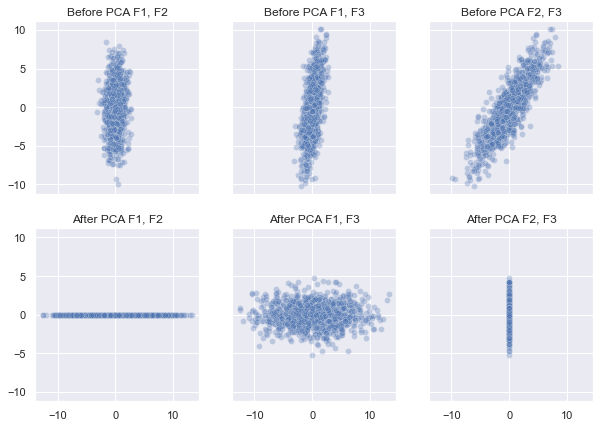

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(10,7), sharex=True, sharey=True)
axes[0,0].set_title('Before PCA F1, F2')
axes[0,1].set_title('Before PCA F1, F3')
axes[0,2].set_title('Before PCA F2, F3')
axes[1,0].set_title('After PCA F1, F2')
axes[1,1].set_title('After PCA F1, F3')
axes[1,2].set_title('After PCA F2, F3')
sns.scatterplot(ax=axes[0, 0], x=df[0,:], y=df[1,:], alpha=0.3)
sns.scatterplot(ax=axes[0, 1], x=df[0,:], y=df[2,:], alpha=0.3)
sns.scatterplot(ax=axes[0, 2], x=df[1,:], y=df[2,:], alpha=0.3)
sns.scatterplot(ax=axes[1, 0], x=df_new[0,:], y=df_new[1,:], alpha=0.3)
sns.scatterplot(ax=axes[1, 1], x=df_new[0,:], y=df_new[2,:], alpha=0.3)
sns.scatterplot(ax=axes[1, 2], x=df_new[1,:], y=df_new[2,:], alpha=0.3)

We see that the plots with F2 are reduced to one dimension due to the small impact of eigenvalue 2

## 2.

In [8]:
g = np.random.normal(loc=0 ,scale=1/50, size=(10, N))
df = np.append(df, g, axis=0)

In [9]:
cov2 = np.cov(df)
l02, V02 = la.eig(cov2)
Lambda2 = np.diag(l02)
l02

array([2.07308194e+01+0.j, 2.26185747e+00+0.j, 1.93499878e-16+0.j,
       4.87745085e-04+0.j, 4.47398853e-04+0.j, 3.32590635e-04+0.j,
       3.47239904e-04+0.j, 4.19913483e-04+0.j, 3.68239320e-04+0.j,
       4.06705797e-04+0.j, 3.80576159e-04+0.j, 3.90946191e-04+0.j,
       3.94898550e-04+0.j])

In [10]:
(Lambda2[0,0]+Lambda2[1,1])/np.trace(Lambda2)
df_new = np.dot(V02.T, df)

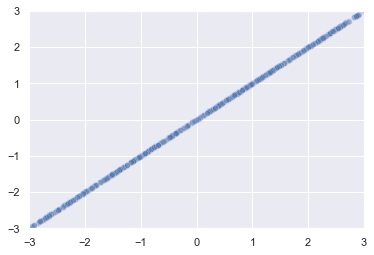

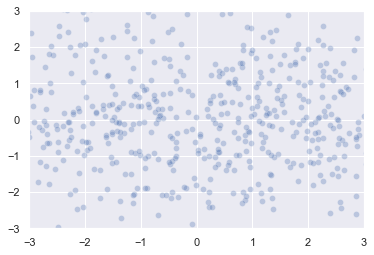

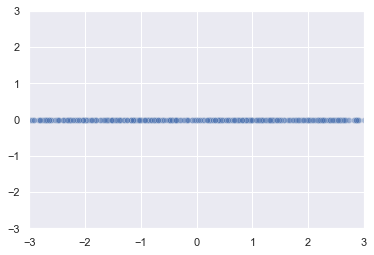

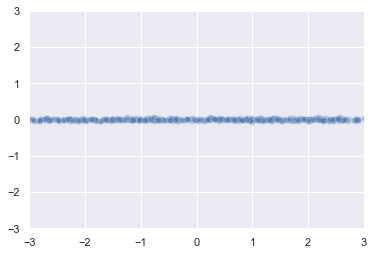

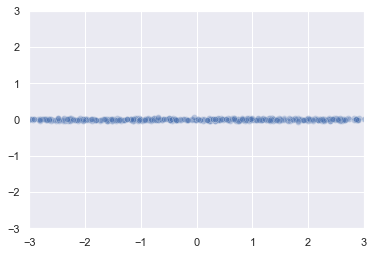

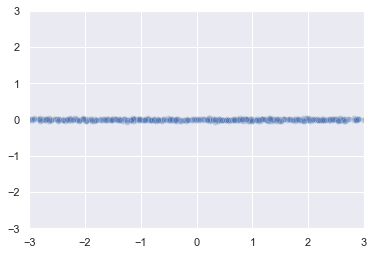

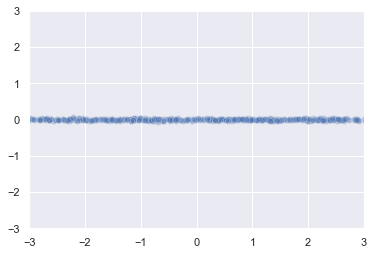

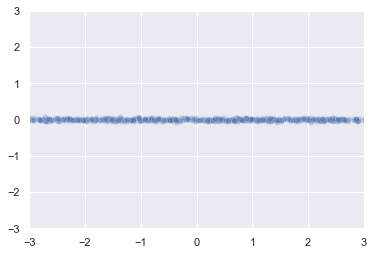

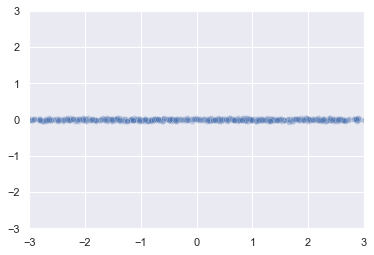

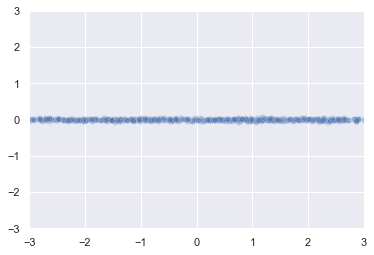

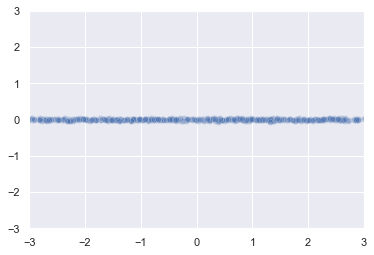

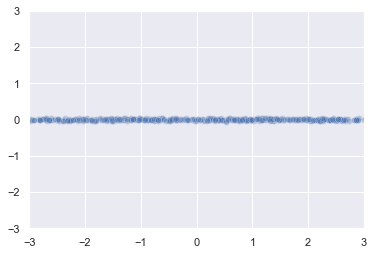

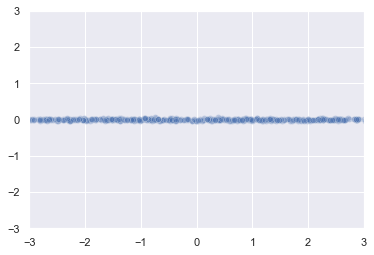

In [11]:
for i in df_new:
    fig
    sns.scatterplot(x=df_new[0,:], y=i, alpha=0.3)
    plt.axis([-3,3,-3,3])
    plt.show()

## 3.

In [12]:
x0 = 1
delta = 0.05
D = 1
m = 2
t = np.linspace(1, 100, 10000)
omega = np.sqrt(D/m - delta ** 2)

x = x0 * np.cos(omega * t) * np.exp(-delta * t) 
y = np.random.normal(0, 1/50, len(x))
z = np.random.normal(0, 1/40, len(x))

/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0.5, 1.0, 'Z')

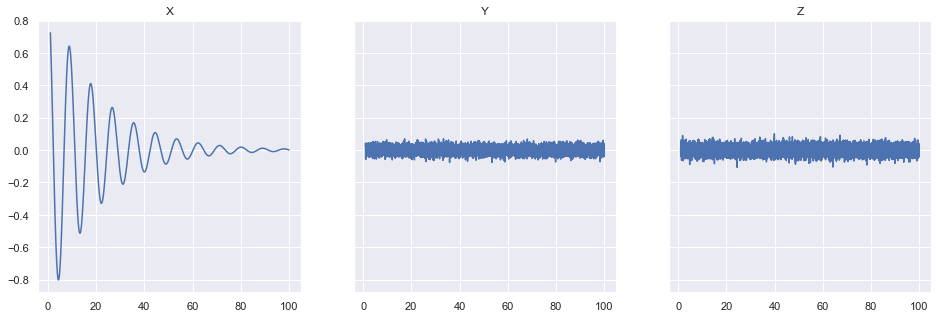

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
sns.lineplot(t, x, ax=axes[0])
sns.lineplot(t, y, ax=axes[1])
sns.lineplot(t, z, ax=axes[2])
axes[0].set_title('X')
axes[1].set_title('Y')
axes[2].set_title('Z')

In [27]:
from scipy.spatial.transform import Rotation as R

spring = np.array([x,y,z])
sspring = np.dot(R.random().as_matrix(), spring)

In [28]:
cov = np.cov(sspring)
l0, V0 = la.eig(cov)
spring_new = np.dot(V0.T, sspring)

/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

<AxesSubplot:>

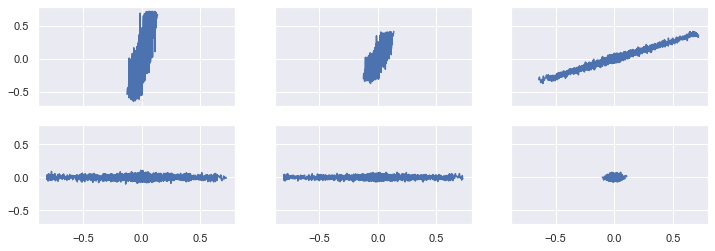

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
sns.lineplot(sspring[0], sspring[1], ax=axes[0,0])
sns.lineplot(sspring[0], sspring[2], ax=axes[0,1])
sns.lineplot(sspring[1], sspring[2], ax=axes[0,2])
sns.lineplot(spring_new[0], spring_new[1], ax=axes[1,0])
sns.lineplot(spring_new[0], spring_new[2], ax=axes[1,1])
sns.lineplot(spring_new[1], spring_new[2], ax=axes[1,2])

## 4.

In [30]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2021-12-06 20:33:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: '/Users/max/data/magic04.data'

magic04.data        100%[===================>]   1.41M   494KB/s    in 2.9s    

2021-12-06 20:33:49 (494 KB/s) - '/Users/max/data/magic04.data' saved [1477391/1477391]

--2021-12-06 20:33:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: '/Users/max/data/magic04.names'

magic04.names       100%[===================>]   5.27K  5.68KB/s    in 0.9s    

2021-12-06 20:33:51 (5.68 KB/s) - '/

In [14]:
data = pd.read_csv('/Users/max/data/magic04.data', header=None)
#names = pd.read_csv('/Users/max/data/magic04.names', error_bad_lines=False)
data = data.drop(columns=10, axis=1)

In [15]:
data = np.array(data.T)
cov = np.cov(data)

In [16]:
l0, V0 = la.eig(cov)

In [18]:
new_data = np.dot(V0.T, data)

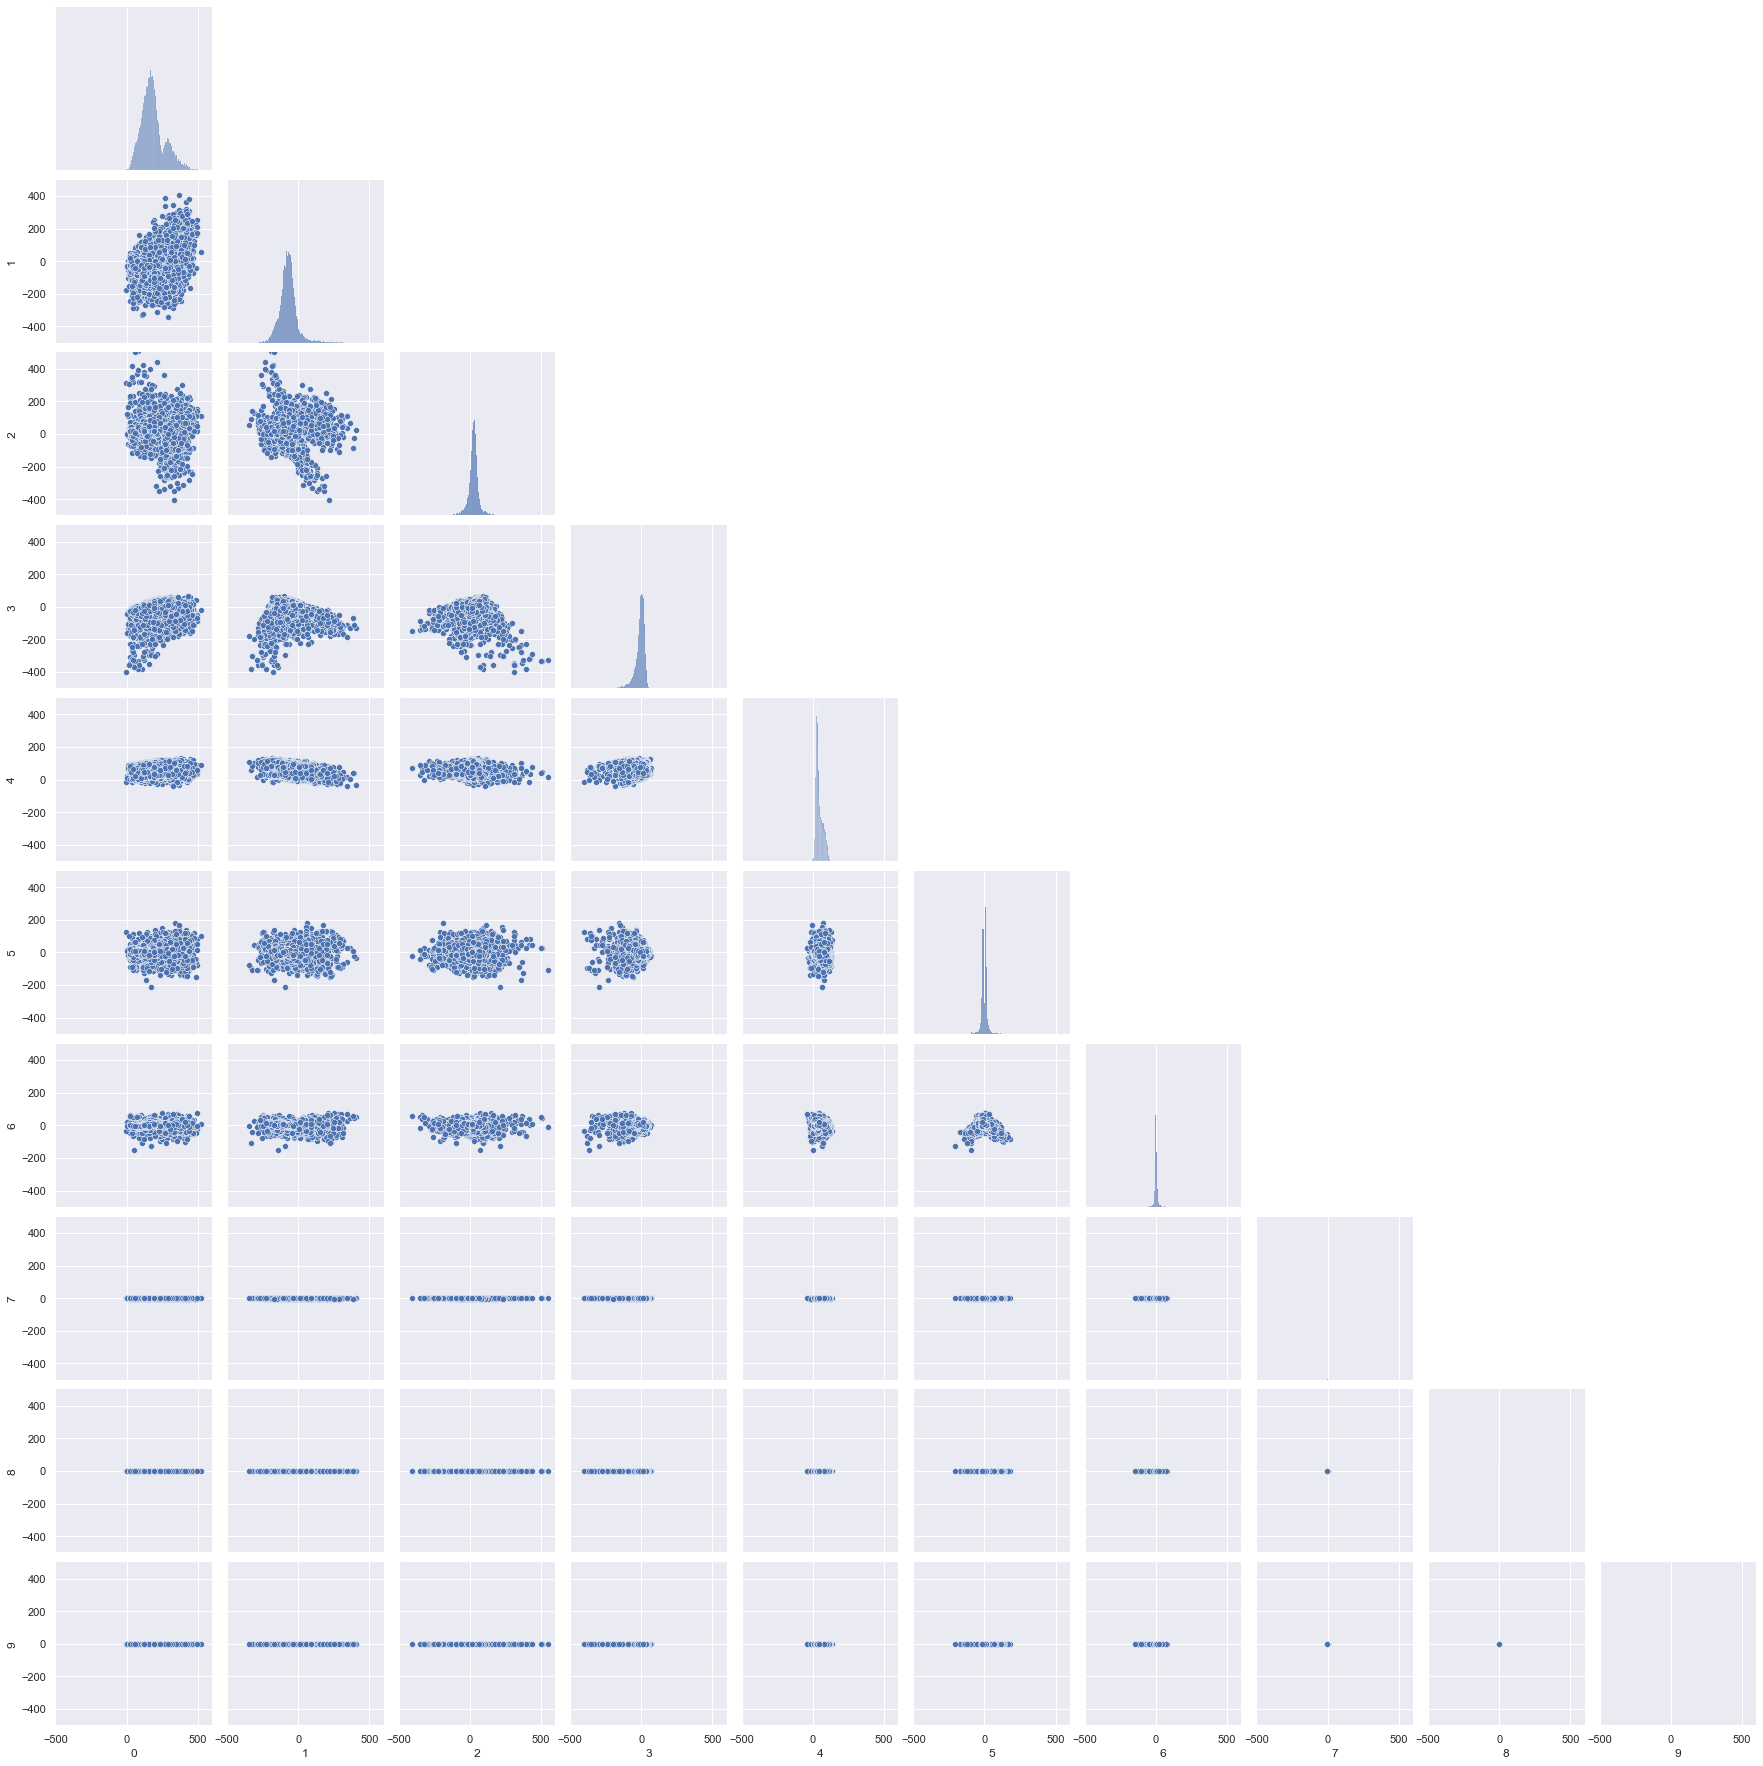

In [37]:
data = pd.DataFrame(new_data[:1000].T).sample(frac=1)
g = sns.pairplot(pd.DataFrame(data), corner=True)
g.set(xlim=[-500,600], ylim=[-500,500])